In [42]:
from galvani import BioLogic
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress # linear regression

Columns: Index(['flags', 'Ns', 'time/s', 'control/mA', 'Ewe/V', 'I/mA', 'dQ/C',
       '(Q-Qo)/C', 'half cycle', 'Q charge/discharge/mA.h', 'I Range'],
      dtype='object')
Row count: 52


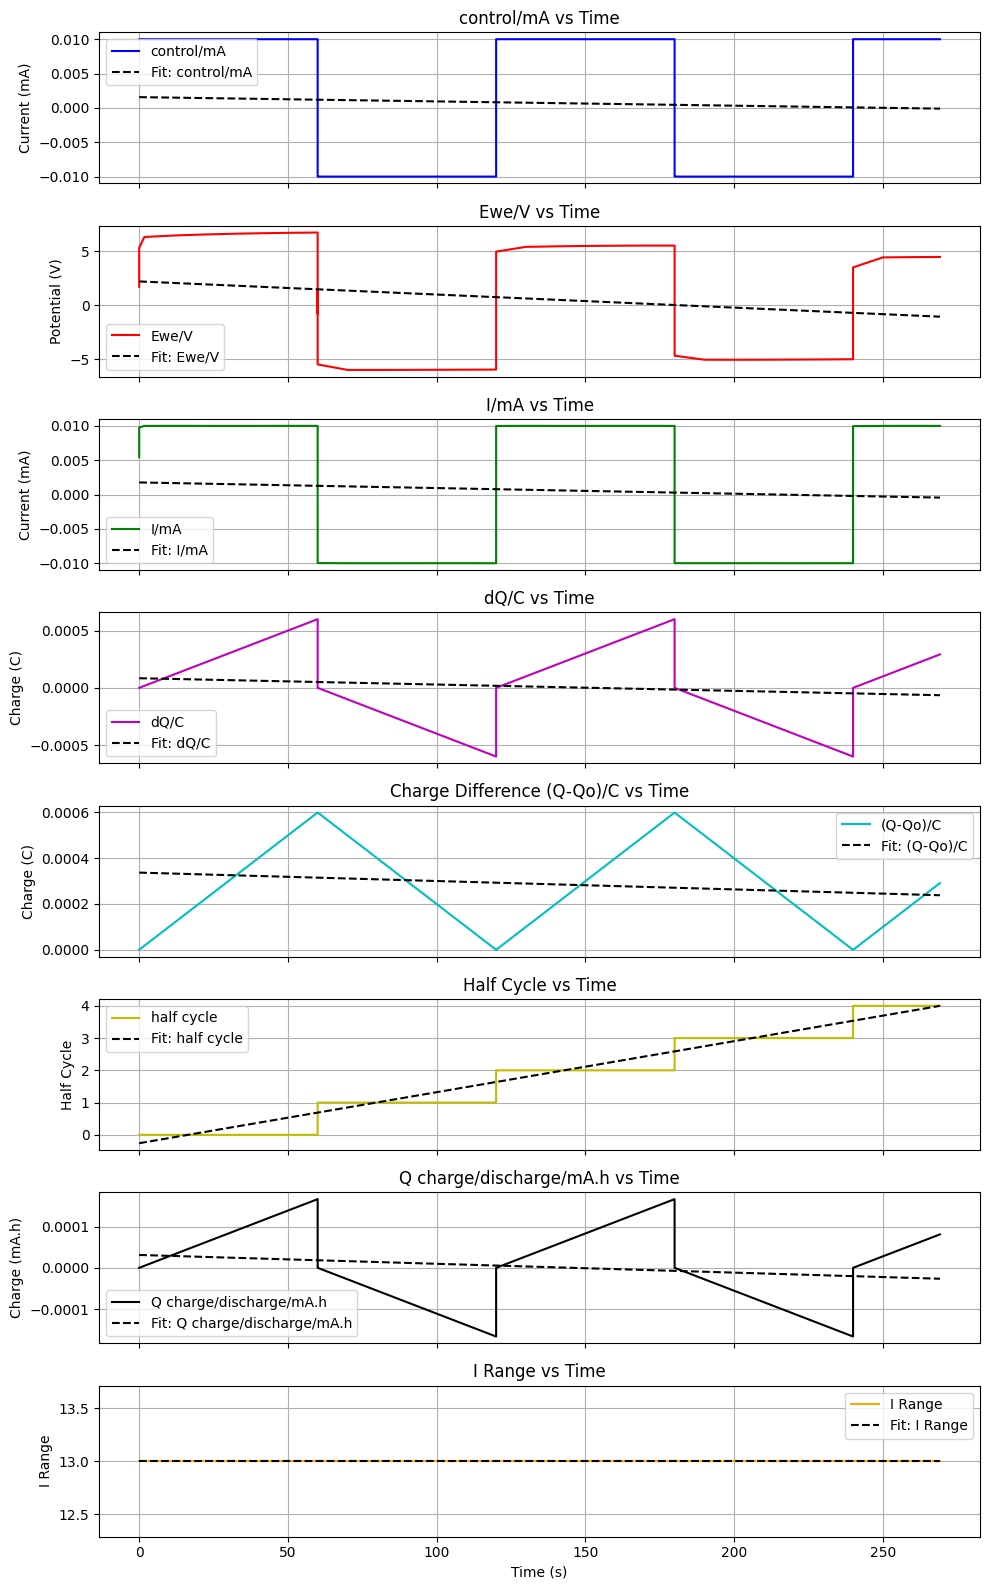

In [43]:
# Load data
mpr_file = BioLogic.MPRfile("CP Test_C01.mpr")
df = pd.DataFrame(mpr_file.data)

# print(df)

# Get columns name
print("Columns:", df.columns)

# Get data count
print("Row count:", df.shape[0])

# Plotting
fig, ax = plt.subplots(8, 1, figsize=(10, 16), sharex=True)

# Function to plot data and best-fit line
def plot_with_fit(ax, x, y, label, color):
    ax.plot(x, y, label=label, color=color)
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    ax.plot(x, intercept + slope * x, color='k', linestyle='--', label=f'Fit: {label}')
    ax.legend()
    ax.grid(True)

# Plot each feature with best-fit line
plot_with_fit(ax[0], df['time/s'], df['control/mA'], 'control/mA', 'b')
plot_with_fit(ax[1], df['time/s'], df['Ewe/V'], 'Ewe/V', 'r')
plot_with_fit(ax[2], df['time/s'], df['I/mA'], 'I/mA', 'g')
plot_with_fit(ax[3], df['time/s'], df['dQ/C'], 'dQ/C', 'm')
plot_with_fit(ax[4], df['time/s'], df['(Q-Qo)/C'], '(Q-Qo)/C', 'c')
plot_with_fit(ax[5], df['time/s'], df['half cycle'], 'half cycle', 'y')
plot_with_fit(ax[6], df['time/s'], df['Q charge/discharge/mA.h'], 'Q charge/discharge/mA.h', 'k')
plot_with_fit(ax[7], df['time/s'], df['I Range'], 'I Range', 'orange')

# Adding titles and labels
ax[0].set_title('control/mA vs Time')
ax[0].set_ylabel('Current (mA)')

ax[1].set_title('Ewe/V vs Time')
ax[1].set_ylabel('Potential (V)')

ax[2].set_title('I/mA vs Time')
ax[2].set_ylabel('Current (mA)')

ax[3].set_title('dQ/C vs Time')
ax[3].set_ylabel('Charge (C)')

ax[4].set_title('Charge Difference (Q-Qo)/C vs Time')
ax[4].set_ylabel('Charge (C)')

ax[5].set_title('Half Cycle vs Time')
ax[5].set_ylabel('Half Cycle')

ax[6].set_title('Q charge/discharge/mA.h vs Time')
ax[6].set_ylabel('Charge (mA.h)')

ax[7].set_title('I Range vs Time')
ax[7].set_ylabel('I Range')
ax[7].set_xlabel('Time (s)')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

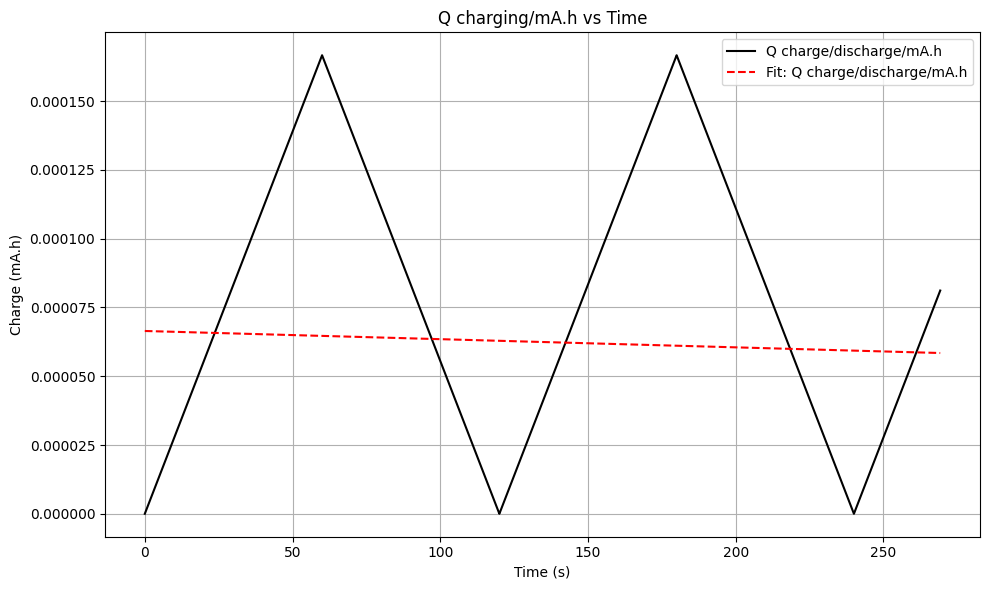

In [44]:
# Filtering data for charging process (assuming charging is indicated by positive values)
charging_df = df[df['Q charge/discharge/mA.h'] > 0]

# Identify the peak charging time
# peak_time = charging_df.loc[charging_df['Q charge/discharge/mA.h'].idxmax(), 'time/s']

# time_60 = 60

# Filter data up to the peak time
# charging_df = charging_df[charging_df['time/s'] <= peak_time]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting and fitting only charging data for Q charge/discharge/mA.h
ax.plot(charging_df['time/s'], charging_df['Q charge/discharge/mA.h'], label='Q charge/discharge/mA.h', color='k')
slope, intercept, r_value, p_value, std_err = linregress(charging_df['time/s'], charging_df['Q charge/discharge/mA.h'])
ax.plot(charging_df['time/s'], intercept + slope * charging_df['time/s'], color='r', linestyle='--', label='Fit: Q charge/discharge/mA.h')

# Adding titles and labels
ax.set_title('Q charging/mA.h vs Time')
ax.set_ylabel('Charge (mA.h)')
ax.set_xlabel('Time (s)')
ax.legend()
ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

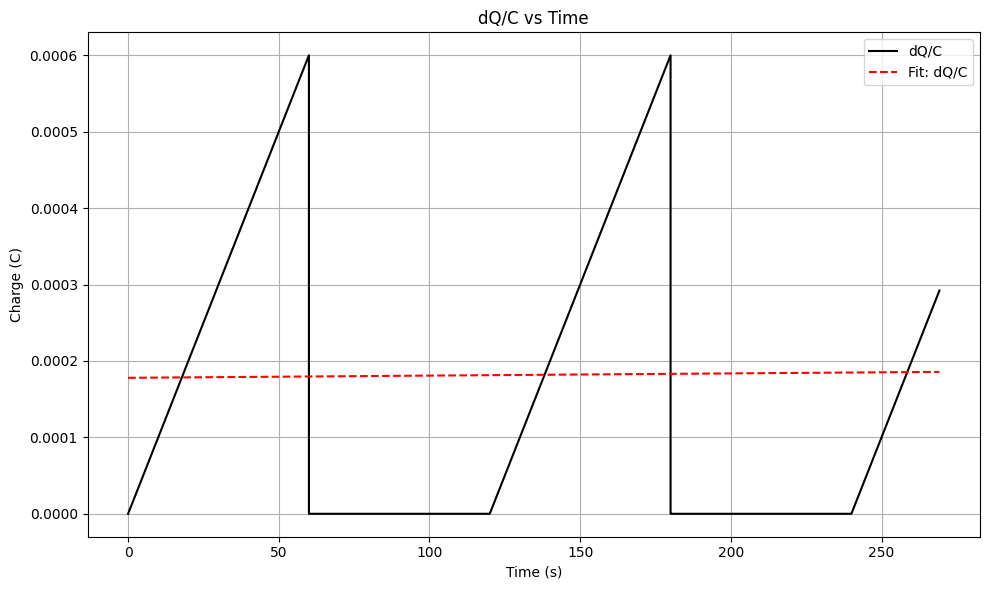

In [36]:
# Filtering data for charging process (assuming charging is indicated by positive values)
charging_df = df[df['dQ/C'] > 0]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting and fitting only charging data for dQ/C
ax.plot(charging_df['time/s'], charging_df['dQ/C'], label='dQ/C', color='k')
slope, intercept, r_value, p_value, std_err = linregress(charging_df['time/s'], charging_df['dQ/C'])
ax.plot(charging_df['time/s'], intercept + slope * charging_df['time/s'], color='r', linestyle='--', label='Fit: dQ/C')

# Adding titles and labels
ax.set_title('dQ/C vs Time')
ax.set_ylabel('Charge (C)')
ax.set_xlabel('Time (s)')
ax.legend()
ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

Columns: Index(['flags', 'Ns', 'time/s', 'control/mA', 'Ewe/V', 'I/mA', 'dQ/C',
       '(Q-Qo)/C', 'half cycle', 'Q charge/discharge/mA.h', 'I Range'],
      dtype='object')
Row count: 12726


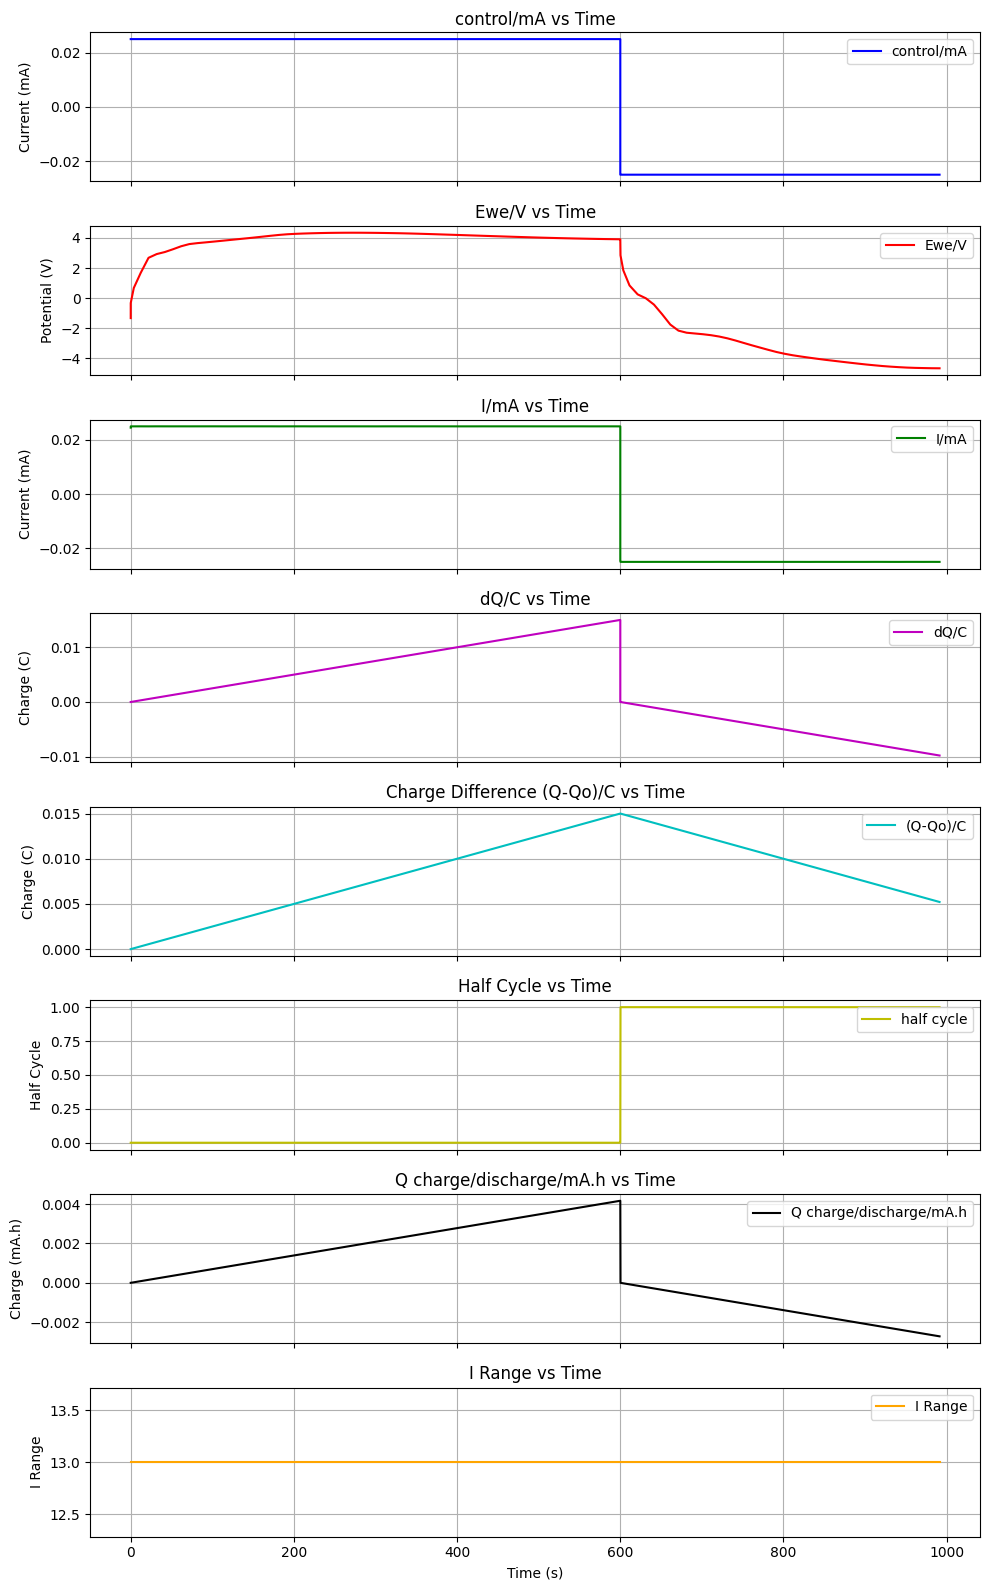

In [53]:

# Load data
mpr_file2 = BioLogic.MPRfile("CP_70 temperature_4_C01.mpr")
df2 = pd.DataFrame(mpr_file2.data)

# Get columns
print("Columns:", df2.columns)

# Get data count
print("Row count:", df2.shape[0])

df2 = df2[df2['time/s'] <= 1000]

# Plotting
fig,ax=plt.subplots(8,1,figsize=(10, 16), sharex=True)

# Plot each feature
ax[0].plot(df2['time/s'], df2['control/mA'], label='control/mA', color='b')
ax[1].plot(df2['time/s'], df2['Ewe/V'], label='Ewe/V', color='r')
ax[2].plot(df2['time/s'], df2['I/mA'], label='I/mA', color='g')
ax[3].plot(df2['time/s'], df2['dQ/C'], label='dQ/C', color='m')
ax[4].plot(df2['time/s'], df2['(Q-Qo)/C'], label='(Q-Qo)/C', color='c')
ax[5].plot(df2['time/s'], df2['half cycle'], label='half cycle', color='y')
ax[6].plot(df2['time/s'], df2['Q charge/discharge/mA.h'], label='Q charge/discharge/mA.h', color='k')
ax[7].plot(df2['time/s'], df2['I Range'], label='I Range', color='orange')

# Adding title and labels
ax[0].set_title('control/mA vs Time')
ax[0].set_ylabel('Current (mA)')
ax[0].legend()
ax[0].grid(True)

ax[1].set_title('Ewe/V vs Time')
ax[1].set_ylabel('Potential (V)')
ax[1].legend()
ax[1].grid(True)

ax[2].set_title('I/mA vs Time')
ax[2].set_ylabel('Current (mA)')
ax[2].legend()
ax[2].grid(True)

ax[3].set_title('dQ/C vs Time')
ax[3].set_ylabel('Charge (C)')
ax[3].legend()
ax[3].grid(True)

ax[4].set_title('Charge Difference (Q-Qo)/C vs Time')
ax[4].set_ylabel('Charge (C)')
ax[4].legend()
ax[4].grid(True)

ax[5].set_title('Half Cycle vs Time')
ax[5].set_ylabel('Half Cycle')
ax[5].legend()
ax[5].grid(True)

ax[6].set_title('Q charge/discharge/mA.h vs Time')
ax[6].set_ylabel('Charge (mA.h)')
ax[6].legend()
ax[6].grid(True)

ax[7].set_title('I Range vs Time')
ax[7].set_ylabel('I Range')
ax[7].set_xlabel('Time (s)')
ax[7].legend()
ax[7].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()


plt.show()

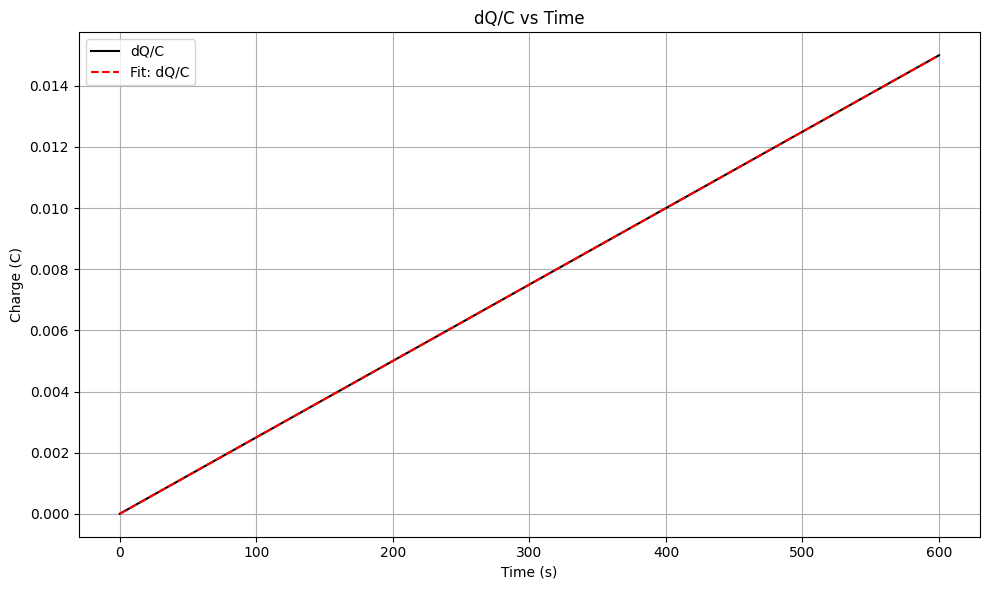

In [50]:
# Filtering data for charging process (assuming charging is indicated by positive values)
# charging_df2 = df2[df2['dQ/C'] > 0]

# Identify the peak charging time
peak_time = df2.loc[df2['dQ/C'].idxmax(), 'time/s']

time_60 = 60

# Filter data up to the peak time
charging_df2 = df2[df2['time/s'] <= peak_time]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting and fitting only charging data for dQ/C
ax.plot(charging_df2['time/s'], charging_df2['dQ/C'], label='dQ/C', color='k')
slope, intercept, r_value, p_value, std_err = linregress(charging_df2['time/s'], charging_df2['dQ/C'])
ax.plot(charging_df2['time/s'], intercept + slope * charging_df2['time/s'], color='r', linestyle='--', label='Fit: dQ/C')

# Adding titles and labels
ax.set_title('dQ/C vs Time')
ax.set_ylabel('Charge (C)')
ax.set_xlabel('Time (s)')
ax.legend()
ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

Columns: Index(['flags', 'Ns', 'time/s', 'control/mA', 'Ewe/V', 'I/mA', 'dQ/C',
       '(Q-Qo)/C', 'half cycle', 'Q charge/discharge/mA.h', 'I Range'],
      dtype='object')
Row count: 17126


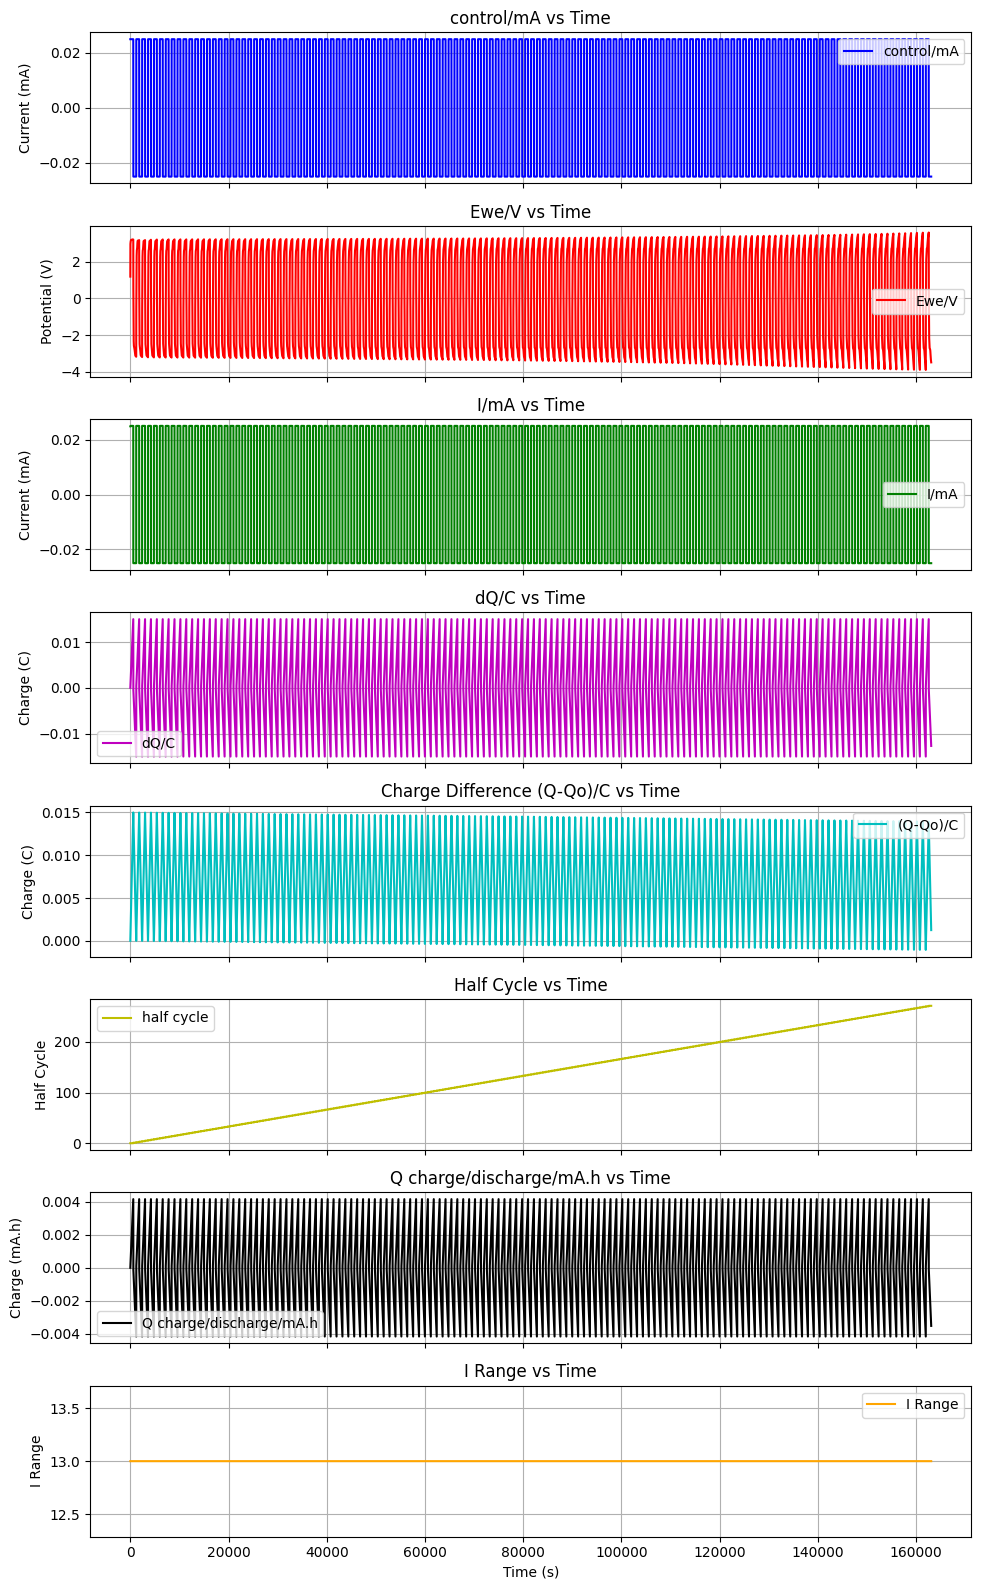

In [17]:

mpr_file3 = BioLogic.MPRfile("CP_70 temperature_5_C01.mpr")
df3 = pd.DataFrame(mpr_file3.data)


# Get columns
print("Columns:", df3.columns)

# Get data count
print("Row count:", df3.shape[0])

# Plotting
fig,ax=plt.subplots(8,1,figsize=(10, 16), sharex=True)

# Plot each feature
ax[0].plot(df3['time/s'], df3['control/mA'], label='control/mA', color='b')
ax[1].plot(df3['time/s'], df3['Ewe/V'], label='Ewe/V', color='r')
ax[2].plot(df3['time/s'], df3['I/mA'], label='I/mA', color='g')
ax[3].plot(df3['time/s'], df3['dQ/C'], label='dQ/C', color='m')
ax[4].plot(df3['time/s'], df3['(Q-Qo)/C'], label='(Q-Qo)/C', color='c')
ax[5].plot(df3['time/s'], df3['half cycle'], label='half cycle', color='y')
ax[6].plot(df3['time/s'], df3['Q charge/discharge/mA.h'], label='Q charge/discharge/mA.h', color='k')
ax[7].plot(df3['time/s'], df3['I Range'], label='I Range', color='orange')

# Adding title and labels
ax[0].set_title('control/mA vs Time')
ax[0].set_ylabel('Current (mA)')
ax[0].legend()
ax[0].grid(True)

ax[1].set_title('Ewe/V vs Time')
ax[1].set_ylabel('Potential (V)')
ax[1].legend()
ax[1].grid(True)

ax[2].set_title('I/mA vs Time')
ax[2].set_ylabel('Current (mA)')
ax[2].legend()
ax[2].grid(True)

ax[3].set_title('dQ/C vs Time')
ax[3].set_ylabel('Charge (C)')
ax[3].legend()
ax[3].grid(True)

ax[4].set_title('Charge Difference (Q-Qo)/C vs Time')
ax[4].set_ylabel('Charge (C)')
ax[4].legend()
ax[4].grid(True)

ax[5].set_title('Half Cycle vs Time')
ax[5].set_ylabel('Half Cycle')
ax[5].legend()
ax[5].grid(True)

ax[6].set_title('Q charge/discharge/mA.h vs Time')
ax[6].set_ylabel('Charge (mA.h)')
ax[6].legend()
ax[6].grid(True)

ax[7].set_title('I Range vs Time')
ax[7].set_ylabel('I Range')
ax[7].set_xlabel('Time (s)')
ax[7].legend()
ax[7].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()


plt.show()

Columns: Index(['flags', 'Ns', 'time/s', 'control/mA', 'Ewe/V', 'I/mA', 'dQ/C',
       '(Q-Qo)/C', 'half cycle', 'Q charge/discharge/mA.h', 'I Range'],
      dtype='object')
Row count: 33941


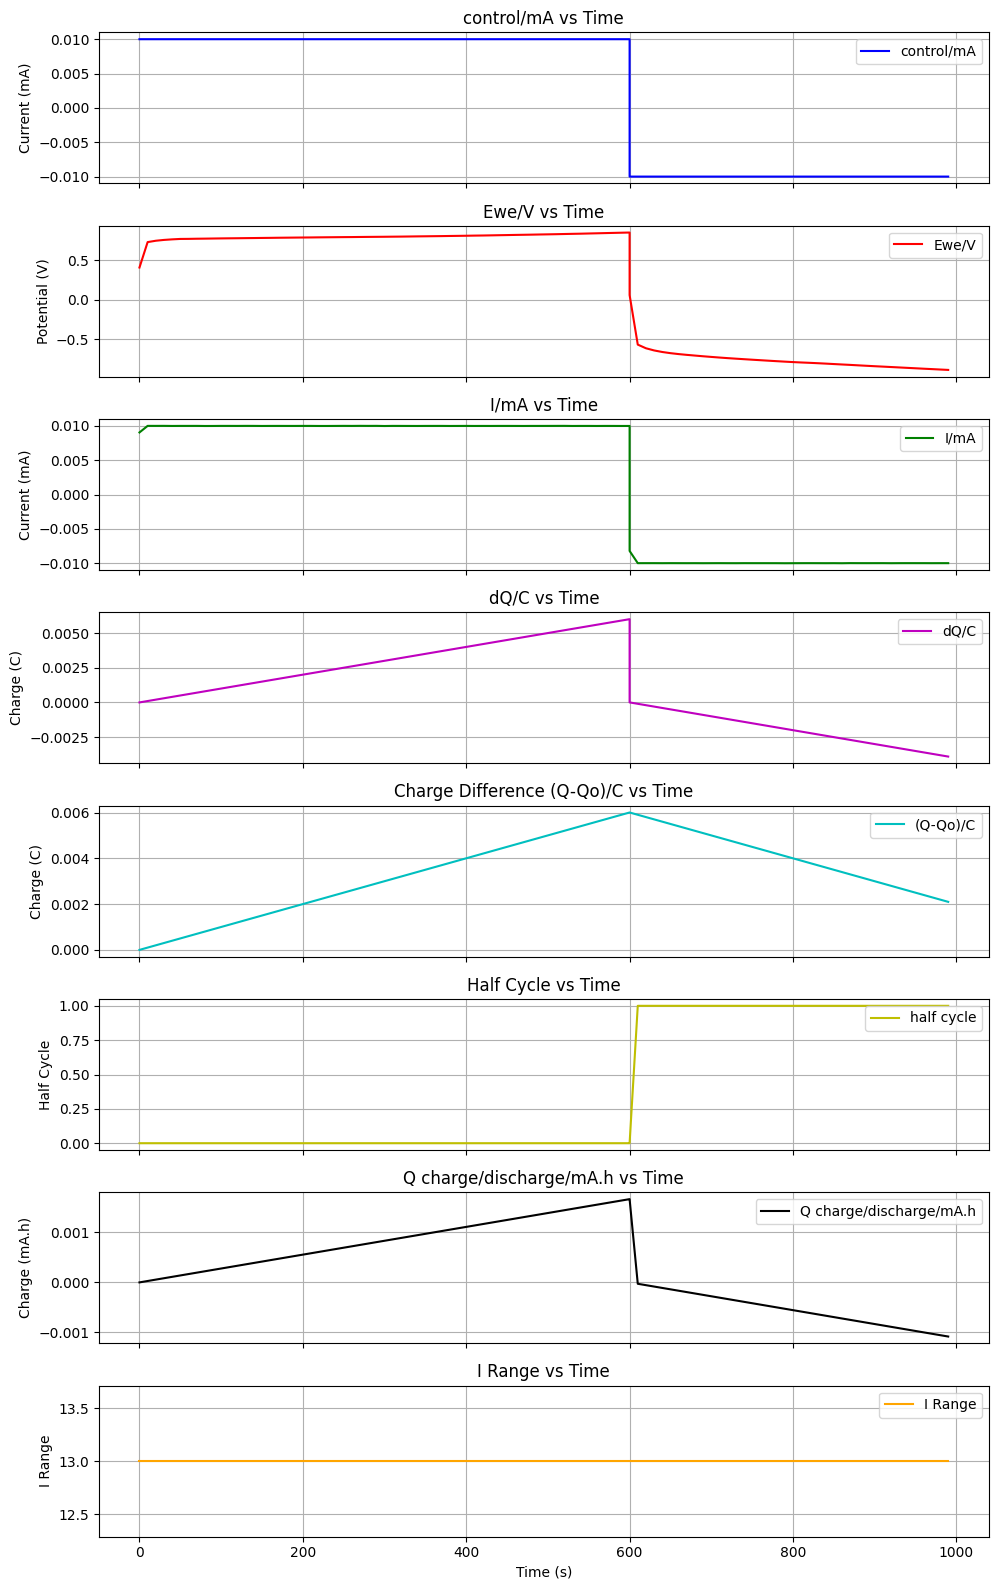

In [56]:
# Load data
mpr_file4 = BioLogic.MPRfile("12to1-25%CNC-3%GQDs _C01.mpr")
df4 = pd.DataFrame(mpr_file4.data)

# Get columns
print("Columns:", df4.columns)

# Get data count
print("Row count:", df4.shape[0])

df4 = df4[df4['time/s'] <= 1000]

# Plotting
fig, ax = plt.subplots(8, 1, figsize=(10, 16), sharex=True)

# Plot each feature
ax[0].plot(df4['time/s'], df4['control/mA'], label='control/mA', color='b')
ax[1].plot(df4['time/s'], df4['Ewe/V'], label='Ewe/V', color='r')
ax[2].plot(df4['time/s'], df4['I/mA'], label='I/mA', color='g')
ax[3].plot(df4['time/s'], df4['dQ/C'], label='dQ/C', color='m')
ax[4].plot(df4['time/s'], df4['(Q-Qo)/C'], label='(Q-Qo)/C', color='c')
ax[5].plot(df4['time/s'], df4['half cycle'], label='half cycle', color='y')
ax[6].plot(df4['time/s'], df4['Q charge/discharge/mA.h'], label='Q charge/discharge/mA.h', color='k')
ax[7].plot(df4['time/s'], df4['I Range'], label='I Range', color='orange')

# Adding title and labels
ax[0].set_title('control/mA vs Time')
ax[0].set_ylabel('Current (mA)')
ax[0].legend()
ax[0].grid(True)

ax[1].set_title('Ewe/V vs Time')
ax[1].set_ylabel('Potential (V)')
ax[1].legend()
ax[1].grid(True)

ax[2].set_title('I/mA vs Time')
ax[2].set_ylabel('Current (mA)')
ax[2].legend()
ax[2].grid(True)

ax[3].set_title('dQ/C vs Time')
ax[3].set_ylabel('Charge (C)')
ax[3].legend()
ax[3].grid(True)

ax[4].set_title('Charge Difference (Q-Qo)/C vs Time')
ax[4].set_ylabel('Charge (C)')
ax[4].legend()
ax[4].grid(True)

ax[5].set_title('Half Cycle vs Time')
ax[5].set_ylabel('Half Cycle')
ax[5].legend()
ax[5].grid(True)

ax[6].set_title('Q charge/discharge/mA.h vs Time')
ax[6].set_ylabel('Charge (mA.h)')
ax[6].legend()
ax[6].grid(True)

ax[7].set_title('I Range vs Time')
ax[7].set_ylabel('I Range')
ax[7].set_xlabel('Time (s)')
ax[7].legend()
ax[7].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


Columns: Index(['flags', 'Ns', 'time/s', 'control/mA', 'Ewe/V', 'I/mA', 'dQ/C',
       '(Q-Qo)/C', 'half cycle', 'Q charge/discharge/mA.h', 'I Range'],
      dtype='object')
Row count: 352


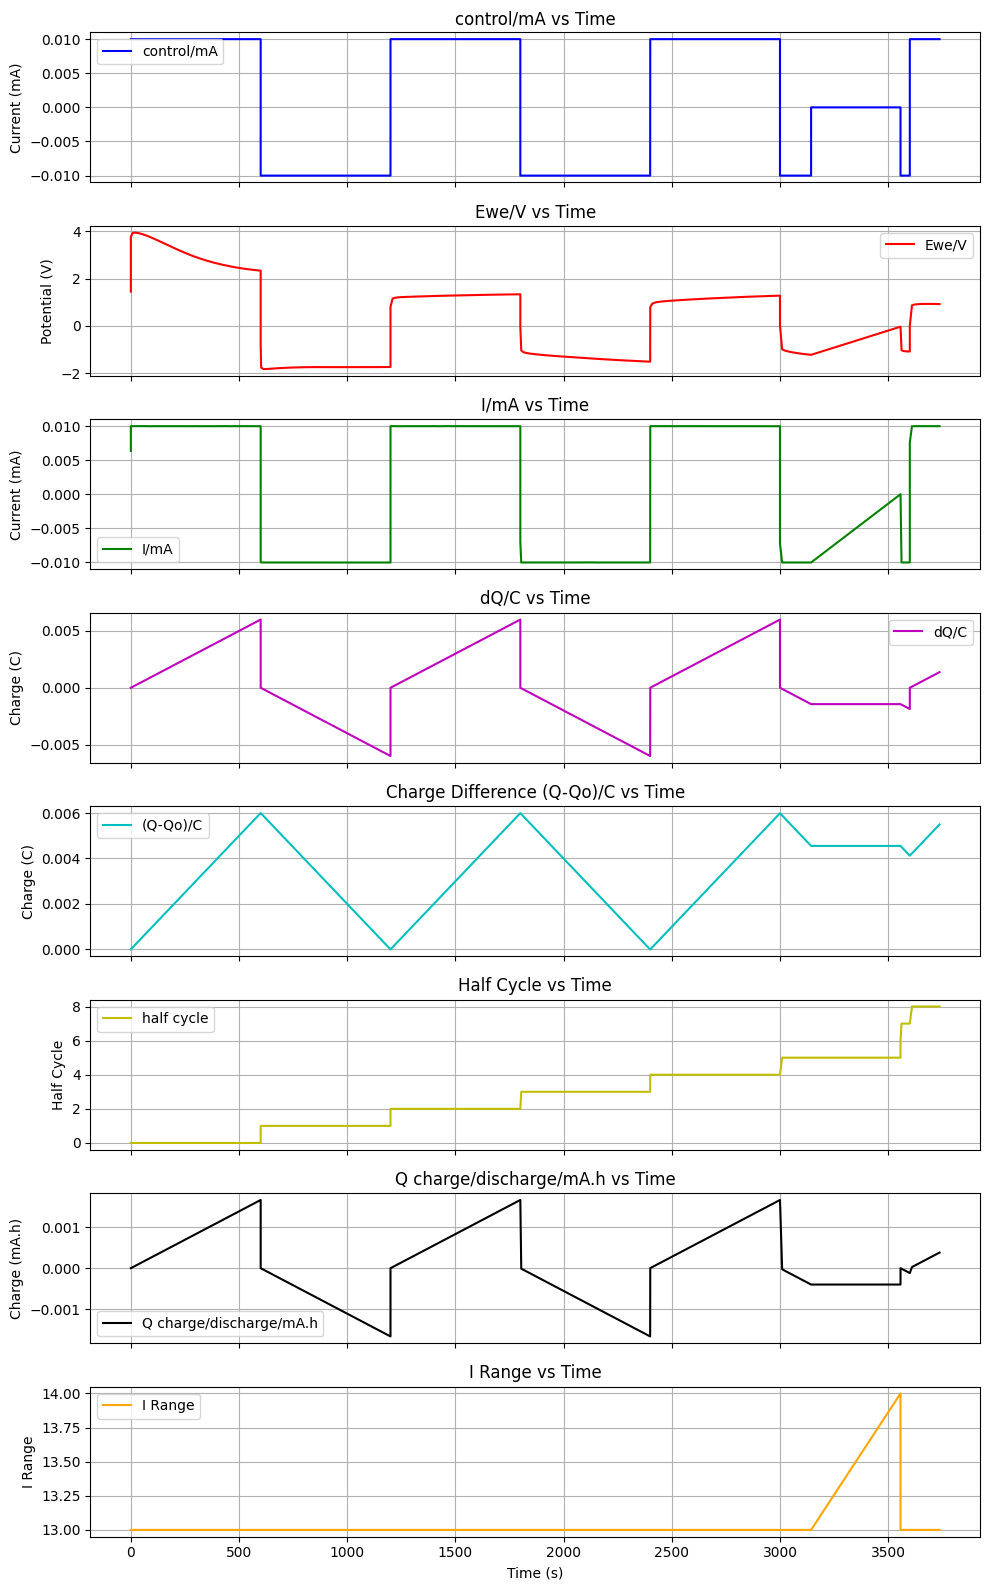

In [19]:
# Load data
mpr_file5 = BioLogic.MPRfile("12to1-25%CNC-3%GQDs CP 35 degrees_C01.mpr")
df5 = pd.DataFrame(mpr_file5.data)

# Get columns
print("Columns:", df5.columns)

# Get data count
print("Row count:", df5.shape[0])

# Plotting
fig, ax = plt.subplots(8, 1, figsize=(10, 16), sharex=True)

# Plot each feature
ax[0].plot(df5['time/s'], df5['control/mA'], label='control/mA', color='b')
ax[1].plot(df5['time/s'], df5['Ewe/V'], label='Ewe/V', color='r')
ax[2].plot(df5['time/s'], df5['I/mA'], label='I/mA', color='g')
ax[3].plot(df5['time/s'], df5['dQ/C'], label='dQ/C', color='m')
ax[4].plot(df5['time/s'], df5['(Q-Qo)/C'], label='(Q-Qo)/C', color='c')
ax[5].plot(df5['time/s'], df5['half cycle'], label='half cycle', color='y')
ax[6].plot(df5['time/s'], df5['Q charge/discharge/mA.h'], label='Q charge/discharge/mA.h', color='k')
ax[7].plot(df5['time/s'], df5['I Range'], label='I Range', color='orange')

# Adding title and labels
ax[0].set_title('control/mA vs Time')
ax[0].set_ylabel('Current (mA)')
ax[0].legend()
ax[0].grid(True)

ax[1].set_title('Ewe/V vs Time')
ax[1].set_ylabel('Potential (V)')
ax[1].legend()
ax[1].grid(True)

ax[2].set_title('I/mA vs Time')
ax[2].set_ylabel('Current (mA)')
ax[2].legend()
ax[2].grid(True)

ax[3].set_title('dQ/C vs Time')
ax[3].set_ylabel('Charge (C)')
ax[3].legend()
ax[3].grid(True)

ax[4].set_title('Charge Difference (Q-Qo)/C vs Time')
ax[4].set_ylabel('Charge (C)')
ax[4].legend()
ax[4].grid(True)

ax[5].set_title('Half Cycle vs Time')
ax[5].set_ylabel('Half Cycle')
ax[5].legend()
ax[5].grid(True)

ax[6].set_title('Q charge/discharge/mA.h vs Time')
ax[6].set_ylabel('Charge (mA.h)')
ax[6].legend()
ax[6].grid(True)

ax[7].set_title('I Range vs Time')
ax[7].set_ylabel('I Range')
ax[7].set_xlabel('Time (s)')
ax[7].legend()
ax[7].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


## Visualizing the Excel data

In [20]:
# Load the Excel file
file_path = "chronopotentiometry For CNF Paper.xlsx"
xls = pd.ExcelFile(file_path)

# Get the columns for each sheet
for sheet_index, sheet_name in enumerate(xls.sheet_names):
    if sheet_index == 0:
        header_value = 1  # Use the second row as header for the first sheet
    else:
        header_value = 0  # Use the first row as header for the other sheets

    df = pd.read_excel(file_path, sheet_name=sheet_name, header=header_value)
    print(f"Sheet: {sheet_name}")
    print("Columns:")
    print(df.columns)
    print()


Sheet: 85C
Columns:
Index(['time/s', 'Ewe/V', 'time/hours', 'time/cycles', 'Ewe/mV', 'Unnamed: 5',
       'time/s.1', 'Ewe/V.1', 'Unnamed: 8', 'time/cycles.1', 'Ewe/V.2',
       'Unnamed: 11', 'Unnamed: 12', 'time/cycles.2', 'Ewe/mV.1', 'Ewe/mV.2',
       'time/hours.1', 'time/cycles.3', 'Ewe/mV.3', 'Ewe/mV.4'],
      dtype='object')

Sheet: 65C
Columns:
Index(['time/s', 'Ewe/V', 'Unnamed: 2', 'time/s.1', 'Ewe/V.1', 'Unnamed: 5',
       'time/s.2', 'Unnamed: 7', 'time/hours', 'time/cycles', 'PEO100/V',
       'PEO4/V', 'PEO100 neat/V'],
      dtype='object')

Sheet: inset PEO
Columns:
Index(['time/cycles', 'PEO100', 'PEO4', 'PEO100 neat', 'Unnamed: 4',
       'Unnamed: 5', 'time/cycles.1', 'PEO100.1', 'PEO4.1', 'PEO100 neat.1'],
      dtype='object')

Sheet: inset 85
Columns:
Index(['cycles', 'Unnamed: 1', 'Unnamed: 2', 'hours', 'cycles.1', 'PEO100',
       'PEO4'],
      dtype='object')

Sheet: inset 65
Columns:
Index(['time,h ', 'Unnamed: 1', 'peo100', 'peo4'], dtype='object')



In [21]:
# Load the Excel file
file_path = "CP for LATP_QD and stretched systems.xlsx"
xls = pd.ExcelFile(file_path)

# Get the columns for each sheet
for sheet_name in xls.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet_name, header = 1)
    print(f"Sheet: {sheet_name}")
    print("Columns:")
    print(df.columns)
    print()

Sheet: LATP_CNF_QD
Columns:
Index(['time, h', 'LATP_QD3', 'LATP_CNF20', 'LATP_CNF20_QD3'], dtype='object')

Sheet: LATP_CNF_QD_OPTIMIZED
Columns:
Index(['time/h', 'CNF0', 'CNF10', 'CNF20'], dtype='object')

Sheet: Stretched samples with CNF
Columns:
Index(['time, h', 'CNF20', 'stretched CNF20', 'stretched CNF10'], dtype='object')



In [22]:
# Load the Excel file
file_path = "PEG 85 chrono.xlsx"
xls = pd.ExcelFile(file_path)

# Get the columns for each sheet
for sheet_name in xls.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    print(f"Sheet: {sheet_name}")
    print("Columns:")
    print(df.columns)
    print()

Sheet: Tabelle1
Columns:
Index(['time/s', 'time/h', 'Ewe/V'], dtype='object')

Sheet: Tabelle2
Columns:
RangeIndex(start=0, stop=0, step=1)

Sheet: Tabelle3
Columns:
RangeIndex(start=0, stop=0, step=1)

